# Import Necessary Library

In [1]:
import json

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sysadm/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
!pip install nlp_utils

import pandas as pd
import numpy as np
import torch
import pickle
import tqdm
import random
import nlp_utils as nu
from collections import Counter


In [3]:
from torch.utils import data

import string
string.punctuation

!pip install langid
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [7]:
# Tokenize the text and remove stopwords and punctuation
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/sysadm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sysadm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
!pip install stop-words
!pip install stop-words

from stop_words import get_stop_words

#!pip install googletrans==4.0.0-rc1

!pip install indic-transliteration
!pip install indic-transliteration
from indic_transliteration import sanscript



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

# Open and parse the JSON file

In [9]:
# Open and parse the JSON file
with open('.//MaSaC_train_erc.json', 'r') as json_file:
    train_data = json.load(json_file)

In [10]:
train_data

[{'episode': 'roseshantstobeadopted.wmv',
  'speakers': ['maya',
   'indu',
   'rosesh',
   'indu',
   'maya',
   'indu',
   'rosesh',
   'indu',
   'sahil',
   'rosesh',
   'maya',
   'indu',
   'sahil',
   'monish',
   'maya',
   'indu',
   'maya',
   'indu',
   'indu',
   'maya',
   'rosesh',
   'maya'],
  'utterances': ['kya kya bhar ke rakha hai indravadan ne is ghar mein indravadan please tum sari bekar ki chijen bahar kyon nahin fekte?',
   'ok, chalo rosesh chalo bahar',
   'momma! hath chhodiye dad!',
   'dekho maya ya na bol raha hai! fir tum hi kahogi faltu chijen jama karte ho fekte nahin ho, chalo',
   'indravadan, tum kitne salo se ye joke maar rahe ho. koi hota hai aaj tak?',
   'kaikai pe joke maroge to manthra thodi na hasegi',
   'very funny',
   'maya, monisha aur sahil aa rahe hain, dekhna yahi jo un per istemal karta hun aur dekhna vah kitna haste hain',
   'hi guys',
   'hi',
   'hi darling. achcha indravadan, please ya kachra bahar fenko!',
   'ok maya, chalo ros

# To view in Every coversation

In [11]:
for conversation in train_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Now you can work with each conversation's data individually
    print("Episode:", episode)
    print("Speakers:", speakers)
    print("Utterances:", utterances)
    print("Emotions:", emotions)
    print("\n")


Episode: roseshantstobeadopted.wmv
Speakers: ['maya', 'indu', 'rosesh', 'indu', 'maya', 'indu', 'rosesh', 'indu', 'sahil', 'rosesh', 'maya', 'indu', 'sahil', 'monish', 'maya', 'indu', 'maya', 'indu', 'indu', 'maya', 'rosesh', 'maya']
Utterances: ['kya kya bhar ke rakha hai indravadan ne is ghar mein indravadan please tum sari bekar ki chijen bahar kyon nahin fekte?', 'ok, chalo rosesh chalo bahar', 'momma! hath chhodiye dad!', 'dekho maya ya na bol raha hai! fir tum hi kahogi faltu chijen jama karte ho fekte nahin ho, chalo', 'indravadan, tum kitne salo se ye joke maar rahe ho. koi hota hai aaj tak?', 'kaikai pe joke maroge to manthra thodi na hasegi', 'very funny', 'maya, monisha aur sahil aa rahe hain, dekhna yahi jo un per istemal karta hun aur dekhna vah kitna haste hain', 'hi guys', 'hi', 'hi darling. achcha indravadan, please ya kachra bahar fenko!', 'ok maya, chalo rosesh tumhen bahar fenk au', 'mom! diwali ka lunch hamare ghar pe', 'aur mein khana fresh banane wali hun', 'i res

# Total number of  episode 

In [12]:
# Create a list to store  episode names
total_episodes_1 = []

for conversation in train_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Add the episode name to the set of unique episodes
    total_episodes_1.append(episode)


# Print the total number of  conversation topics or episodes
print("Total episode topics:", len(total_episodes_1))

Total episode topics: 343


# Distinct Episode name in coversation

In [13]:
# Convert the list of episode names to a set to get unique episodes
unique_episodes_1 = set(total_episodes_1)

# Print the unique episode names
print("Unique episode names:", unique_episodes_1)

# Print the total number of unique episodes
print("Total unique episodes:", len(unique_episodes_1))


Unique episode names: {'mayaonacleaningdrive.wmv', 'mayanighmare', 'radhabaileaves', 'cricket.wmv', 'video1.wmv', 'jugalkishore.wmv', 'newcar', 'baldev', 'election', 'sahilmarriesmonisha.wmv', 'neelimaverma.wmv', 'lease2.wmv', 'prankonindravadhan', 'husbandsdonotcheat.avi', 'roseshnayadon.wmv', 'roseshpoetrypublication.wmv', 'yamraj.wmv', 'doggy', 'roseshmarriesrita.wmw', 'mayaleavesindravardhan(1) (1).wmv', 'bachelor.wmv', 'introductiontothesarabhaifamily.avi', 'finale.avi', 'mayadoubtsindravardhan.wmv', 'sharman.wmw', 'mayabetmonisha.wmv', 'roseshantstobeadopted.wmv', 'monishaadaptstohighsociety', 'bachlorparty', 'playatcharityfunction', 'soniyaprediction.avi', 'scrabblecompetition.avi', 'khilawal.wmv', 'mayaleavesindravardhan.wmv', 'roseshaccident', 'monishasspeechonmaya.wmv', 'monishasuicideattempt.wmv', 'african', 'patang', 'jaspal.wmv', 'sahillovestory.wmv', 'prefinale', 'monishacomplainsofsahil.wmv', 'mayamonishabday.avi', 'popatlal', 'kavi.wmv', 'dushyant', 'indravadanmissing.a

# To view all episode name

In [14]:
total_episodes_1

['roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 '

To find how many times each episode name occurs in conversation

In [15]:
total_episodes_1

episode_counts = {}

for episode_title in total_episodes_1:
    episode_counts[episode_title] = episode_counts.get(episode_title, 0) + 1

for title, count in episode_counts.items():
    print(f"{title} occurs {count} times")


roseshantstobeadopted.wmv occurs 5 times
video1.wmv occurs 8 times
yamraj.wmv occurs 7 times
finale.avi occurs 13 times
indravadanmissing.avi occurs 7 times
sharman.wmw occurs 6 times
soniyaprediction.avi occurs 7 times
bachelor.wmv occurs 7 times
cricket.wmv occurs 8 times
husbandsdonotcheat.avi occurs 11 times
introductiontothesarabhaifamily.avi occurs 6 times
jugalkishore.wmv occurs 8 times
kavi.wmv occurs 4 times
lease1.wmv occurs 8 times
lease2.wmv occurs 7 times
mayaleavesindravardhan(1) (1).wmv occurs 6 times
mayadoubtsindravardhan.wmv occurs 6 times
jaspal.wmv occurs 5 times
khilawal.wmv occurs 4 times
mayabetmonisha.wmv occurs 10 times
mayaleavesindravardhan.wmv occurs 6 times
mayamonishabday.avi occurs 6 times
mayanighmare occurs 5 times
mayaonacleaningdrive.wmv occurs 9 times
monishaadaptstohighsociety occurs 6 times
roseshnayadon.wmv occurs 5 times
roseshmarriesrita.wmw occurs 6 times
roseshpoetrypublication.wmv occurs 6 times
sahillovestory.wmv occurs 5 times
sahilmarriesm

Convert all utterance of each episode into a single DataFrame 

In [16]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in train_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
final_df = pd.concat(conversation_data, ignore_index=True)
final_df

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral
...,...,...,...,...
8501,radhabaileaves,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness
8502,radhabaileaves,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger
8503,radhabaileaves,maya,ahan!,joy
8504,radhabaileaves,sita or geeta,goodbye!,fear


 Save the DataFrame to a CSV file

In [17]:
# Save the DataFrame to a CSV file
#final_df.to_csv('./final_data_1.csv', index=False)


give the episode number for each episode starting with 1

In [18]:
import pandas as pd

# Create an empty list to store the data for each conversation
conversation_data_id = []

# Initialize an episode counter
episode_no = 1

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in train_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode_NO": [episode_no] * len(speakers),  # Assign the episode NO
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Increment the episode ID for the next conversation
    episode_no += 1

    # Append the DataFrame to the list
    conversation_data_id.append(df)

# Concatenate all conversation DataFrames into one DataFrame
final_df_id = pd.concat(conversation_data_id, ignore_index=True)
final_df_id


,Episode_NO,Episode,Speakers,Utterances,Emotions
0,1,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt
2,1,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger
3,1,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,1,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral
...,...,...,...,...,...
8501,343,radhabaileaves,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness
8502,343,radhabaileaves,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger
8503,343,radhabaileaves,maya,ahan!,joy
8504,343,radhabaileaves,sita or geeta,goodbye!,fear


 find how many distinct emotions exist in whole conversation

In [19]:
data = final_df_id
# Find distinct emotions
distinct_emotions = data['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
disgust
contempt
anger
neutral
joy
sadness
fear
surprise


Visualise the emotion status count in whole conversation

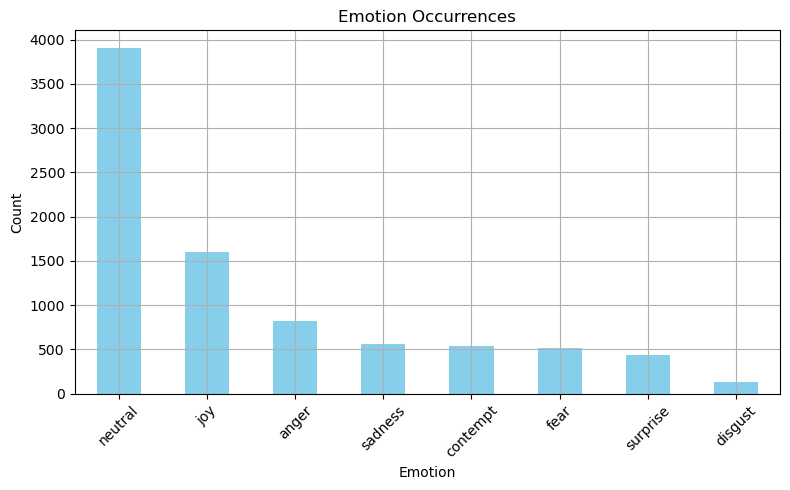

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each emotion
emotion_counts = final_df['Emotions'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()


Visualise the emotion status in percentage on overall whole conversation

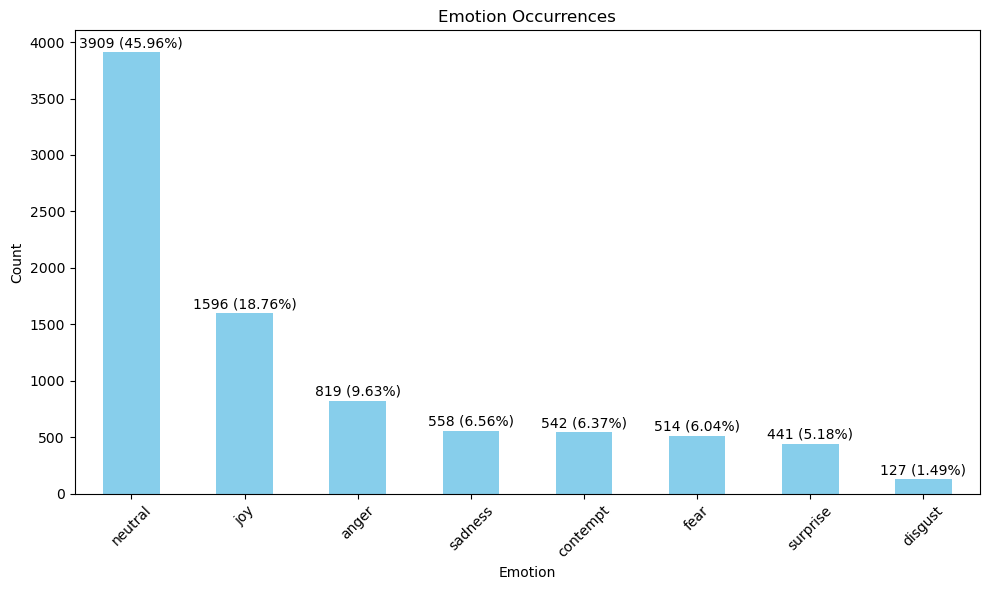

In [17]:
import matplotlib.pyplot as plt

# Assuming you already have 'distinct_emotions' and 'data' from your previous code

# Count the occurrences of each emotion
emotion_counts = data['Emotions'].value_counts()

# Calculate the percentage of each emotion
total_emotions = len(data)
emotion_percentages = (emotion_counts / total_emotions) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add percentage labels above each bar
for i, v in enumerate(emotion_counts):
    ax.text(i, v + 20, f'{v} ({emotion_percentages[i]:.2f}%)', ha='center', va='bottom')

# Show the plot
#plt.savefig("/content/drive/MyDrive/nlp project/EDiReF-Train-Data-20230906T131211Z-001/EDiReF-Train-Data/picturesave/emotionoccures.png")
plt.show()


 Input the episode No for which you want to print unique speaker's name

In [21]:

# Input the episode No for which you want to print unique speaker's name
episode_id_to_print = int(input("Enter the desired episode NO: "))

# Filter the DataFrame for the specified episode ID
episode_data = data[data['Episode_NO'] == episode_id_to_print]

# Check if any data was found for the specified episode ID
if not episode_data.empty:
    # Get unique speakers within the episode
    unique_speakers = episode_data['Speakers'].unique()

    # Print the episode information and speaker numbers
    print(f"Episode NO: {episode_id_to_print}")
    print(f"Episode Name: {episode_data['Episode'].iloc[0]}")
    print(f"Unique Speakers:")
    for i, speaker in enumerate(unique_speakers, start=1):
        print(f"Speaker {i}: {speaker}")
else:
    print(f"No data found for Episode NO {episode_id_to_print}. Please check the ID.")


Enter the desired episode NO: 45
Episode NO: 45
Episode Name: sharman.wmw
Unique Speakers:
Speaker 1: sharman
Speaker 2: indravardhan
Speaker 3: rosesh
Speaker 4: madhu
Speaker 5: inspector
Speaker 6: sahil
Speaker 7: monisha


Find the conversation speakers' name  in between minimum and maximum episode no 

In [22]:
# Find the minimum and maximum episode IDs from your DataFrame
min_episode_id = data['Episode_NO'].min()
max_episode_id = data['Episode_NO'].max()

# Input the episode no for which you want to print unique speakers' names
episode_id_to_print = int(input(f"Enter the desired episode NO between[{min_episode_id} and {max_episode_id}]: "))

# Check if the entered episode ID is within the valid range
if min_episode_id <= episode_id_to_print <= max_episode_id:
    # Filter the DataFrame for the specified episode ID
    episode_data = data[data['Episode_NO'] == episode_id_to_print]

    # Check if any data was found for the specified episode ID
    if not episode_data.empty:
        # Get unique speakers within the episode
        unique_speakers = episode_data['Speakers'].unique()

        # Print the episode information and speaker numbers
        print(f"Episode NO: {episode_id_to_print}")
        print(f"Episode Name: {episode_data['Episode'].iloc[0]}")
        print(f"Unique Speakers:")
        for i, speaker in enumerate(unique_speakers, start=1):
            print(f"Speaker {i}: {speaker}")
    else:
        print(f"No data found for Episode NO {episode_id_to_print}. Please check the ID.")
else:
    print(f"Invalid episode ID. Please enter a number between {min_episode_id} and {max_episode_id}.")


Enter the desired episode NO between[1 and 343]: 45
Episode NO: 45
Episode Name: sharman.wmw
Unique Speakers:
Speaker 1: sharman
Speaker 2: indravardhan
Speaker 3: rosesh
Speaker 4: madhu
Speaker 5: inspector
Speaker 6: sahil
Speaker 7: monisha


In [23]:
# Define the episode no for which you want to print speaker numbers
episode_id_to_print = 2  # Change this to the desired episode ID

# Filter the DataFrame for the specified episode ID(episode no )
episode_data = data[data['Episode_NO'] == episode_id_to_print]

# Get unique speakers within the episode
unique_speakers = episode_data['Speakers'].unique()

# Print the episode information and speaker numbers
print(f"Episode NO: {episode_id_to_print}")
print(f"Episode Name: {episode_data['Episode'].iloc[0]}")
print(f"Unique Speakers:")
for i, speaker in enumerate(unique_speakers, start=1):
    print(f"Speaker {i}: {speaker}")


Episode NO: 2
Episode Name: roseshantstobeadopted.wmv
Unique Speakers:
Speaker 1: maya
Speaker 2: rosesh
Speaker 3: indu
Speaker 4: monisha
Speaker 5: sahil


To find unique speakers within the episode

In [25]:
# Assuming you have a DataFrame named final_df

# Get unique episode IDs
unique_episode_ids = data['Episode_NO'].unique()

# Iterate through unique episode IDs and print speaker numbers for each episode
for episode_id_to_print in unique_episode_ids:
    # Filter the DataFrame for the specified episode ID
    episode_data = data[data['Episode_NO'] == episode_id_to_print]

    # Get unique speakers within the episode
    unique_speakers = episode_data['Speakers'].unique()

    # Print the episode information and speaker numbers
    print(f"Episode NO: {episode_id_to_print}")
    print(f"Episode Name: {episode_data['Episode'].iloc[0]}")
    print(f"Unique Speakers:")
    for i, speaker in enumerate(unique_speakers, start=1):
        print(f"Speaker {i}: {speaker}")
    print("\n")  # Add a newline for separation between episodes


Episode NO: 1
Episode Name: roseshantstobeadopted.wmv
Unique Speakers:
Speaker 1: maya
Speaker 2: indu
Speaker 3: rosesh
Speaker 4: sahil
Speaker 5: monish


Episode NO: 2
Episode Name: roseshantstobeadopted.wmv
Unique Speakers:
Speaker 1: maya
Speaker 2: rosesh
Speaker 3: indu
Speaker 4: monisha
Speaker 5: sahil


Episode NO: 3
Episode Name: roseshantstobeadopted.wmv
Unique Speakers:
Speaker 1: maya
Speaker 2: indu
Speaker 3: rosesh


Episode NO: 4
Episode Name: roseshantstobeadopted.wmv
Unique Speakers:
Speaker 1: sahil
Speaker 2: monisha
Speaker 3: rosesh


Episode NO: 5
Episode Name: roseshantstobeadopted.wmv
Unique Speakers:
Speaker 1: rosesh
Speaker 2: maya


Episode NO: 6
Episode Name: video1.wmv
Unique Speakers:
Speaker 1: indravardhan
Speaker 2: monisha
Speaker 3: sahil
Speaker 4: rosesh


Episode NO: 7
Episode Name: video1.wmv
Unique Speakers:
Speaker 1: maya
Speaker 2: indravardhan
Speaker 3: kismi


Episode NO: 8
Episode Name: video1.wmv
Unique Speakers:
Speaker 1: sahil
Sp

# Define the source and target scripts

In [31]:
# Define the source and target scripts
source_script = sanscript.DEVANAGARI
target_script = sanscript.ITRANS

hindi_stopwords = get_stop_words('hi')  # 'hi' is the ISO 639-1 code for Hindi
hindi_stopwords

['अत',
 'अपना',
 'अपनी',
 'अपने',
 'अभी',
 'अंदर',
 'आदि',
 'आप',
 'इत्यादि',
 'इन',
 'इनका',
 'इन्हीं',
 'इन्हें',
 'इन्हों',
 'इस',
 'इसका',
 'इसकी',
 'इसके',
 'इसमें',
 'इसी',
 'इसे',
 'उन',
 'उनका',
 'उनकी',
 'उनके',
 'उनको',
 'उन्हीं',
 'उन्हें',
 'उन्हों',
 'उस',
 'उसके',
 'उसी',
 'उसे',
 'एक',
 'एवं',
 'एस',
 'ऐसे',
 'और',
 'कई',
 'कर',
 'करता',
 'करते',
 'करना',
 'करने',
 'करें',
 'कहते',
 'कहा',
 'का',
 'काफ़ी',
 'कि',
 'कितना',
 'किन्हें',
 'किन्हों',
 'किया',
 'किर',
 'किस',
 'किसी',
 'किसे',
 'की',
 'कुछ',
 'कुल',
 'के',
 'को',
 'कोई',
 'कौन',
 'कौनसा',
 'गया',
 'घर',
 'जब',
 'जहाँ',
 'जा',
 'जितना',
 'जिन',
 'जिन्हें',
 'जिन्हों',
 'जिस',
 'जिसे',
 'जीधर',
 'जैसा',
 'जैसे',
 'जो',
 'तक',
 'तब',
 'तरह',
 'तिन',
 'तिन्हें',
 'तिन्हों',
 'तिस',
 'तिसे',
 'तो',
 'था',
 'थी',
 'थे',
 'दबारा',
 'दिया',
 'दुसरा',
 'दूसरे',
 'दो',
 'द्वारा',
 'न',
 'नके',
 'नहीं',
 'ना',
 'निहायत',
 'नीचे',
 'ने',
 'पर',
 'पहले',
 'पूरा',
 'पे',
 'फिर',
 'बनी',
 'बही',
 'बहुत',
 'बाद',
 'बाला',
 'ब

In [30]:
# Transliterate Hindi to Roman script (English characters)
transliterated_text = [sanscript.transliterate(word, source_script, target_script) for word in hindi_stopwords]

# Convert transliterated words to lowercase
lowercase_transliterated_text = [word.lower() for word in transliterated_text]

# Print the lowercase transliterated words
print(lowercase_transliterated_text)

['ata', 'apana', 'apani', 'apane', 'abhi', 'amdara', 'adi', 'apa', 'ityadi', 'ina', 'inaka', 'inhim', 'inhem', 'inhom', 'isa', 'isaka', 'isaki', 'isake', 'isamem', 'isi', 'ise', 'una', 'unaka', 'unaki', 'unake', 'unako', 'unhim', 'unhem', 'unhom', 'usa', 'usake', 'usi', 'use', 'eka', 'evam', 'esa', 'aise', 'aura', 'kai', 'kara', 'karata', 'karate', 'karana', 'karane', 'karem', 'kahate', 'kaha', 'ka', 'kafi', 'ki', 'kitana', 'kinhem', 'kinhom', 'kiya', 'kira', 'kisa', 'kisi', 'kise', 'ki', 'kucha', 'kula', 'ke', 'ko', 'koi', 'kauna', 'kaunasa', 'gaya', 'ghara', 'jaba', 'jaha.n', 'ja', 'jitana', 'jina', 'jinhem', 'jinhom', 'jisa', 'jise', 'jidhara', 'jaisa', 'jaise', 'jo', 'taka', 'taba', 'taraha', 'tina', 'tinhem', 'tinhom', 'tisa', 'tise', 'to', 'tha', 'thi', 'the', 'dabara', 'diya', 'dusara', 'dusare', 'do', 'dvara', 'na', 'nake', 'nahim', 'na', 'nihayata', 'niche', 'ne', 'para', 'pahale', 'pura', 'pe', 'phira', 'bani', 'bahi', 'bahuta', 'bada', 'bala', 'bilakula', 'bhi', 'bhitara', '

In [32]:
#print the hindi stopwords
hindi_stopwords = lowercase_transliterated_text
hindi_stopwords

['ata',
 'apana',
 'apani',
 'apane',
 'abhi',
 'amdara',
 'adi',
 'apa',
 'ityadi',
 'ina',
 'inaka',
 'inhim',
 'inhem',
 'inhom',
 'isa',
 'isaka',
 'isaki',
 'isake',
 'isamem',
 'isi',
 'ise',
 'una',
 'unaka',
 'unaki',
 'unake',
 'unako',
 'unhim',
 'unhem',
 'unhom',
 'usa',
 'usake',
 'usi',
 'use',
 'eka',
 'evam',
 'esa',
 'aise',
 'aura',
 'kai',
 'kara',
 'karata',
 'karate',
 'karana',
 'karane',
 'karem',
 'kahate',
 'kaha',
 'ka',
 'kafi',
 'ki',
 'kitana',
 'kinhem',
 'kinhom',
 'kiya',
 'kira',
 'kisa',
 'kisi',
 'kise',
 'ki',
 'kucha',
 'kula',
 'ke',
 'ko',
 'koi',
 'kauna',
 'kaunasa',
 'gaya',
 'ghara',
 'jaba',
 'jaha.n',
 'ja',
 'jitana',
 'jina',
 'jinhem',
 'jinhom',
 'jisa',
 'jise',
 'jidhara',
 'jaisa',
 'jaise',
 'jo',
 'taka',
 'taba',
 'taraha',
 'tina',
 'tinhem',
 'tinhom',
 'tisa',
 'tise',
 'to',
 'tha',
 'thi',
 'the',
 'dabara',
 'diya',
 'dusara',
 'dusare',
 'do',
 'dvara',
 'na',
 'nake',
 'nahim',
 'na',
 'nihayata',
 'niche',
 'ne',
 'para',


# combined list of stopwords for both English and Hindi

In [34]:
english_stopwords = set(stopwords.words('english'))
# Define your combined list of stopwords for both English and Hindi
stop_words = set(english_stopwords)  # English stopwords
# Add Hindi stopwords to the set
hindi_stop_words = set(hindi_stopwords)  # Add your Hindi stopwords here
hindi_stop_words
stop_words.update(hindi_stop_words)
stop_words

{'a',
 'abhi',
 'about',
 'above',
 'adi',
 'after',
 'again',
 'against',
 'ain',
 'aise',
 'all',
 'am',
 'amdara',
 'an',
 'and',
 'any',
 'apa',
 'apana',
 'apane',
 'apani',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'ata',
 'aura',
 'bada',
 'bahi',
 'bahuta',
 'bala',
 'bani',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bhi',
 'bhitara',
 'bilakula',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'dabara',
 'did',
 'didn',
 "didn't",
 'diya',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'dusara',
 'dusare',
 'dvara',
 'each',
 'eka',
 'esa',
 'evam',
 'few',
 'for',
 'from',
 'further',
 'gaya',
 'ghara',
 'had',
 'hadn',
 "hadn't",
 'hai',
 'haim',
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'hi',
 'him',
 'himself',
 'his',
 'ho',
 'hona',
 'hone',
 'hota',
 'hote',
 'hoti',
 'how',
 'hua',
 'hue',
 'hui',
 'i',
 'if',
 

# Pre processing code for each utterance

In [35]:
import string
from nltk.corpus import stopwords

# Function clean text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove extra white spaces
    text = ' '.join(text.split())

    # Remove stopwords
    total_stop_words = stop_words
    text = ' '.join([word for word in text.split() if word not in total_stop_words])

    return text


In [36]:
preprocess_text('kya kya bhar ke rakha hai indravadan ne is gha...	')

'kya kya bhar rakha indravadan gha'

Apply preprocessing to the 'Utterances' column

In [39]:
# Apply preprocessing to the 'Utterances' column
final_df['Clean_text'] = final_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
final_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt,ok chalo rosesh chalo bahar
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger,momma hath chhodiye dad
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...,...,...,...
8501,radhabaileaves,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness,lekin ghadi 17000 ghadi momma recurring alarm ...
8502,radhabaileaves,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,radhabaileaves,maya,ahan!,joy,ahan
8504,radhabaileaves,sita or geeta,goodbye!,fear,goodbye


taken the clean text column and emotion column

In [40]:
# Assuming your DataFrame is named "df"
selected_columns = final_df[["Clean_text", "Emotions"]]
dt = selected_columns[0:100]
dt

,Clean_text,Emotions
0,kya kya bhar rakha indravadan ghar mein indrav...,disgust
1,ok chalo rosesh chalo bahar,contempt
2,momma hath chhodiye dad,anger
3,dekho maya bol fir tum kahogi faltu chijen jam...,neutral
4,indravadan tum kitne salo joke maar aaj tak,neutral
...,...,...
95,vah wala pani lekar aao,neutral
96,okay,neutral
97,hello mujhe batao tum ro kyon,anger
98,momma momma wo mujhe maarna chahti sahil bhai,sadness


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

Convert a the clean text  to the TF-IDF features  

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Sample code-mixed data (replace with your DataFrame)
data = selected_columns


# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(data['Clean_text'])

# Convert a DataFrame  to the TF-IDF features  
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
data = pd.concat([data, tfidf_df], axis=1)
data

,Clean_text,Emotions,10,100,1000,10000,10002000,100150,100200,1012,...,zoom,zooro,zor,zubaan,zubaani,zuban,zukaam,zyaada,zyada,zyatti
0,kya kya bhar rakha indravadan ghar mein indrav...,disgust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ok chalo rosesh chalo bahar,contempt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,momma hath chhodiye dad,anger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,dekho maya bol fir tum kahogi faltu chijen jam...,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,indravadan tum kitne salo joke maar aaj tak,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,lekin ghadi 17000 ghadi momma recurring alarm ...,sadness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8502,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun,anger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8503,ahan,joy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8504,goodbye,fear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split the data into training and testing sets

In [45]:
# Split the data into training and testing sets
X = tfidf_features  # Features (TF-IDF features obtained earlier)
y = data['Emotions']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVM classifier 

In [46]:
# Initialize and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_svm_linear = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy_svm_linear)

              precision    recall  f1-score   support

       anger       0.20      0.01      0.01       168
    contempt       0.27      0.03      0.06       119
     disgust       0.00      0.00      0.00        28
        fear       0.40      0.05      0.09        83
         joy       0.54      0.19      0.28       313
     neutral       0.49      0.94      0.65       801
     sadness       0.40      0.04      0.07       107
    surprise       0.75      0.14      0.24        83

    accuracy                           0.49      1702
   macro avg       0.38      0.17      0.17      1702
weighted avg       0.45      0.49      0.38      1702

Confusion Matrix:
 [[  1   2   0   0   1 162   2   0]
 [  0   4   0   1   7 107   0   0]
 [  1   2   0   0   1  24   0   0]
 [  0   0   0   4   3  75   1   0]
 [  0   1   0   0  58 251   2   1]
 [  3   5   0   2  32 756   0   3]
 [  0   1   0   2   3  97   4   0]
 [  0   0   0   1   2  67   1  12]]
Accuracy: 0.4929494712103408


/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes classifier

In [47]:
from sklearn.naive_bayes import MultinomialNB
# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_naive = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy_naive)


Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00       168
    contempt       0.00      0.00      0.00       119
     disgust       0.00      0.00      0.00        28
        fear       0.00      0.00      0.00        83
         joy       0.63      0.08      0.14       313
     neutral       0.48      0.99      0.65       801
     sadness       1.00      0.02      0.04       107
    surprise       0.00      0.00      0.00        83

    accuracy                           0.48      1702
   macro avg       0.26      0.14      0.10      1702
weighted avg       0.40      0.48      0.33      1702

Confusion Matrix:
 [[  0   0   0   0   0 168   0   0]
 [  0   0   0   0   5 114   0   0]
 [  0   0   0   0   1  27   0   0]
 [  0   0   0   0   0  83   0   0]
 [  0   0   0   0  24 289   0   0]
 [  0   0   0   0   6 795   0   0]
 [  0   0   0   0   0 105   2   0]
 [  0   0   0   0   2  81   0   0]]
Accuracy: 0.4823736780258

/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM classifier(kernel='poly')

In [48]:
from sklearn.svm import SVC
# Train an SVM classifier
svm_classifier = SVC(kernel='poly', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_svm_pred = svm_classifier.predict(X_test)

# Evaluate the SVM model
print("SVM Classification Report:\n", classification_report(y_test, y_svm_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_svm_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_svm_poly = accuracy_score(y_test, y_svm_pred)

# Print the accuracy
print("Accuracy:", accuracy_svm_poly)



SVM Classification Report:
               precision    recall  f1-score   support

       anger       1.00      0.01      0.01       168
    contempt       0.00      0.00      0.00       119
     disgust       0.00      0.00      0.00        28
        fear       0.00      0.00      0.00        83
         joy       0.53      0.09      0.16       313
     neutral       0.48      0.97      0.64       801
     sadness       0.60      0.03      0.05       107
    surprise       0.61      0.13      0.22        83

    accuracy                           0.48      1702
   macro avg       0.40      0.15      0.14      1702
weighted avg       0.49      0.48      0.35      1702

SVM Confusion Matrix:
 [[  1   0   0   1   0 166   0   0]
 [  0   0   0   0   4 115   0   0]
 [  0   0   0   0   1  27   0   0]
 [  0   0   0   0   1  82   0   0]
 [  0   0   0   0  29 281   1   2]
 [  0   2   0   4  17 773   0   5]
 [  0   0   0   0   1 103   3   0]
 [  0   0   0   0   2  69   1  11]]
Accuracy: 0.48002

/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
# Train a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_lr_pred = logistic_regression_classifier.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_lr_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_lr_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_logistic = accuracy_score(y_test, y_lr_pred)

# Print the accuracy
print("Accuracy:", accuracy_logistic)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       anger       0.38      0.02      0.03       168
    contempt       0.00      0.00      0.00       119
     disgust       0.00      0.00      0.00        28
        fear       0.40      0.02      0.05        83
         joy       0.47      0.18      0.26       313
     neutral       0.48      0.93      0.64       801
     sadness       0.31      0.04      0.07       107
    surprise       0.58      0.08      0.15        83

    accuracy                           0.48      1702
   macro avg       0.33      0.16      0.15      1702
weighted avg       0.42      0.48      0.36      1702

Logistic Regression Confusion Matrix:
 [[  3   0   0   0   1 162   2   0]
 [  0   0   0   0  11 108   0   0]
 [  1   1   0   0   1  25   0   0]
 [  0   0   0   2   3  77   1   0]
 [  1   0   0   0  56 253   2   1]
 [  3   3   0   1  43 744   3   4]
 [  0   0   0   1   3  99   4   0]
 [  0   0   0   1   2

/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_rf_pred = random_forest_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:\n", classification_report(y_test, y_rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier on the test data
accuracy_rm_forest = accuracy_score(y_test, y_rf_pred)

# Print the accuracy
print("Accuracy:", accuracy_rm_forest)


Random Forest Classification Report:
               precision    recall  f1-score   support

       anger       0.20      0.02      0.03       168
    contempt       0.33      0.05      0.09       119
     disgust       0.25      0.04      0.06        28
        fear       0.16      0.04      0.06        83
         joy       0.47      0.21      0.29       313
     neutral       0.49      0.88      0.63       801
     sadness       0.45      0.08      0.14       107
    surprise       0.39      0.17      0.24        83

    accuracy                           0.48      1702
   macro avg       0.34      0.19      0.19      1702
weighted avg       0.42      0.48      0.38      1702

Random Forest Confusion Matrix:
 [[  3   1   1   1   7 155   0   0]
 [  2   6   0   0   9 100   1   1]
 [  0   1   1   0   1  25   0   0]
 [  0   0   0   3   3  76   1   0]
 [  1   1   0   1  65 238   4   3]
 [  6   8   2   9  46 708   4  18]
 [  1   1   0   1   4  91   9   0]
 [  2   0   0   4   2  60   1  14

compare the all accuracy of different classifier

In [53]:
compare = pd.DataFrame({"Model":["Naive baise","SVM_poly","Random forest","Logistic regreesion","SVM_linear"],"Accuracy":[accuracy_naive*100,accuracy_svm_poly*100,accuracy_rm_forest*100,accuracy_logistic*100,accuracy_svm_linear*100]})
sorted_compare = compare.sort_values(by='Accuracy', ascending=False)
sorted_compare

,Model,Accuracy
4,SVM_linear,49.294947
0,Naive baise,48.237368
1,SVM_poly,48.002350
3,Logistic regreesion,47.943596
2,Random forest,47.532315
